In [5]:
# 1.Firstly, replace all Missing values with relevant figures.

import pandas as pd
import numpy as np

# Load the dataset
filename = 'Dataset_Day9.csv'
df = pd.read_csv(filename)

# Columns to replace 0 values with the median
columns_to_replace = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Replace 0 values with the median of the respective column
for column in columns_to_replace:
    median_value = df[column].replace(0, np.nan).median()
    df[column] = df[column].replace(0, median_value)

# Print the first few rows of the dataframe to verify changes
print(df.head())

# Save the updated dataframe to a new CSV file (optional)
df.to_csv('Dataset_Day9_Cleaned.csv', index=False)

   Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age  \
0            6    148.0           72.0  33.6                     0.627   50   
1            1     85.0           66.0  26.6                     0.351   31   
2            8    183.0           64.0  23.3                     0.672   32   
3            1     89.0           66.0  28.1                     0.167   21   
4            0    137.0           40.0  43.1                     2.288   33   

   Outcome  
0        1  
1        0  
2        1  
3        0  
4        1  


In [6]:
# 2.Then remove all existing outliers and get the final data for classification.

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers for the specified columns
for column in columns_to_replace:
    df = remove_outliers(df, column)

# Print the shape of the dataframe to verify changes
print(df.shape)

# Save the cleaned dataframe to a new CSV file (optional)
df.to_csv('Dataset_Day9_Cleaned_NoOutliers.csv', index=False)

(706, 7)


In [7]:
# 3.Split the data into 75% training and 25% testing data. Then, use a SVM classifier algorithm with target variable as ‘Outcome’.
#     a.Print the default model performance metrics: Accuracy, Precision, Recall, F1Score


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the cleaned dataset
filename = 'Dataset_Day9_Cleaned_NoOutliers.csv'
df = pd.read_csv(filename)

# Define features and target variable
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Step 3: Split the data into 75% training and 25% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

# Step 4: Train an SVM classifier
svm = SVC(random_state=1234)
svm.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print(f"Default SVM Performance Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Default SVM Performance Metrics:
Accuracy: 0.8305084745762712
Precision: 0.9459459459459459
Recall: 0.5555555555555556
F1 Score: 0.7


D:\python3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\python3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\python3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\python3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is

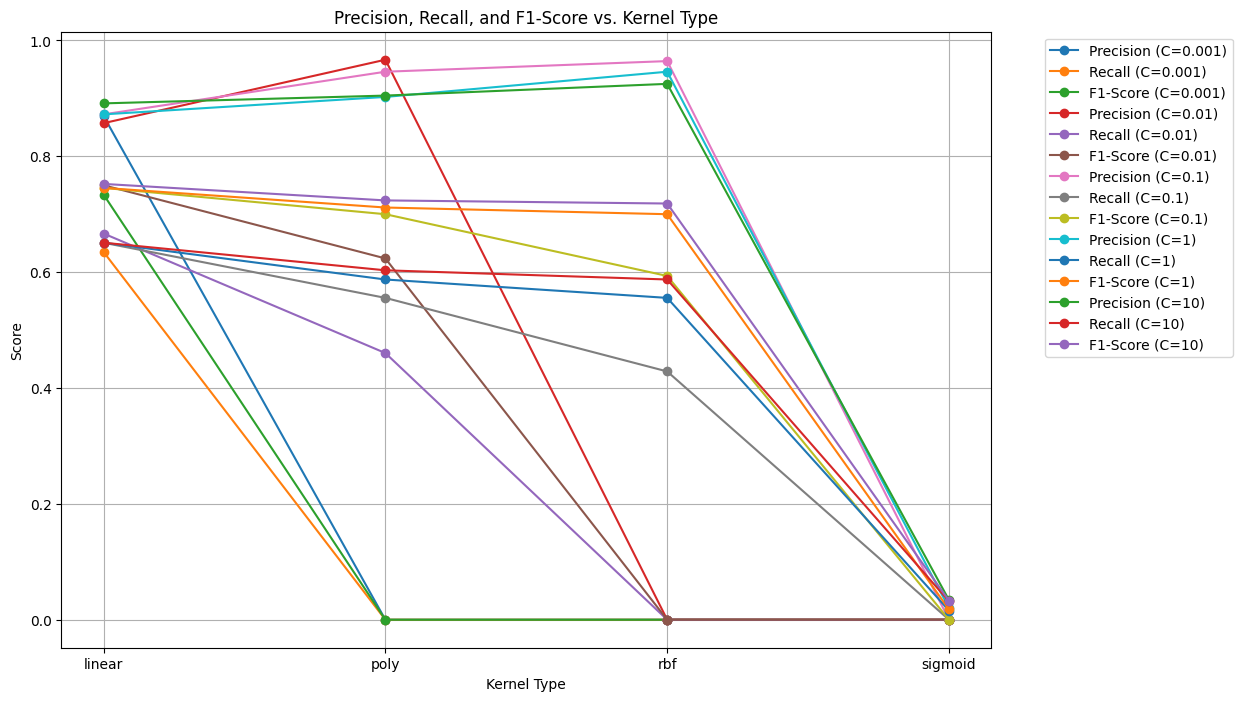

Best Kernel and C Value:
Kernel         linear
C                10.0
Precision    0.891304
Recall       0.650794
F1-Score     0.752294
Name: 4, dtype: object


In [8]:
# b.Print Precision & Recall & F1-Score vs kernel type('linear', 'poly', 'rbf', 'sigmoid') curve (All metrics on the same graph). Find the kernel type for which F1-score is the highest. Take (C = 0.001,0.01,0.1,1,10)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the cleaned dataset
filename = 'Dataset_Day9_Cleaned_NoOutliers.csv'
df = pd.read_csv(filename)

# Define features and target variable
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split the data into 75% training and 25% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

# Define the kernels and C values to be tested
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.001, 0.01, 0.1, 1, 10]

# Initialize lists to store metrics
results = []

# Loop over each kernel and C value
for kernel in kernels:
    for C in C_values:
        svm = SVC(kernel=kernel, C=C, random_state=1234)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results.append((kernel, C, precision, recall, f1))

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results, columns=['Kernel', 'C', 'Precision', 'Recall', 'F1-Score'])

# Plotting Precision, Recall, and F1-Score vs. kernel type for each value of C
plt.figure(figsize=(12, 8))
for C in C_values:
    subset = results_df[results_df['C'] == C]
    plt.plot(subset['Kernel'], subset['Precision'], marker='o', label=f'Precision (C={C})')
    plt.plot(subset['Kernel'], subset['Recall'], marker='o', label=f'Recall (C={C})')
    plt.plot(subset['Kernel'], subset['F1-Score'], marker='o', label=f'F1-Score (C={C})')

plt.xlabel('Kernel Type')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score vs. Kernel Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Find the kernel type and C value for which F1-Score is the highest
best_result = results_df.loc[results_df['F1-Score'].idxmax()]
print("Best Kernel and C Value:")
print(best_result)

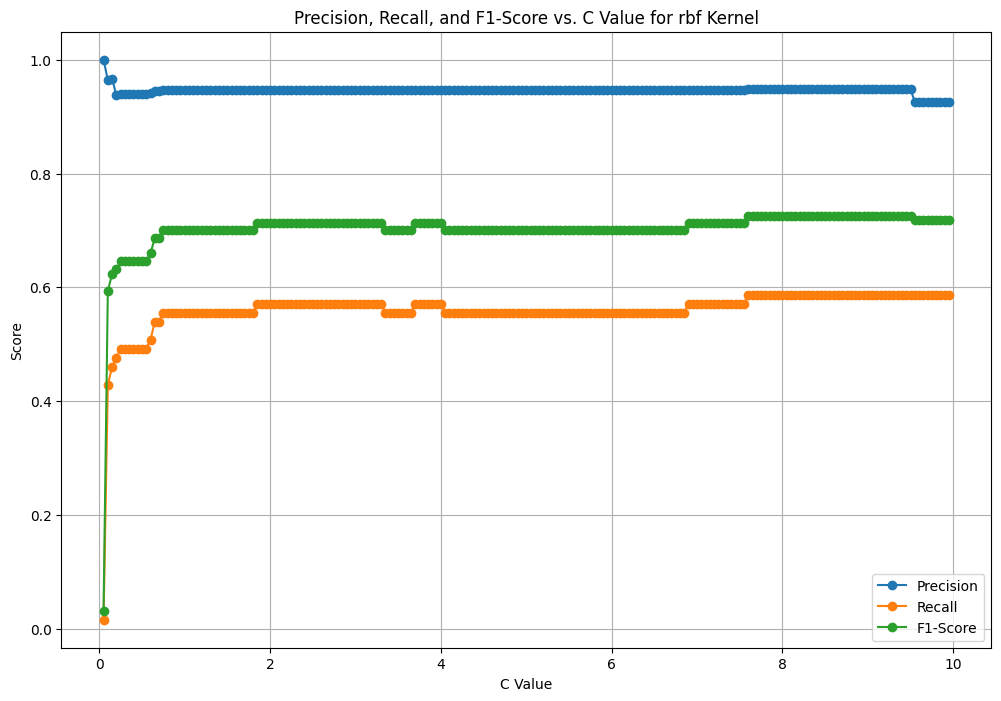

Best C Value: 7.6000000000000005
Highest F1-Score: 0.7254901960784313


In [1]:
# c.Plot a curve on Precision & Recall & F1-Score vs appropriate range of C using the best kernel type you obtained in question(3b), (All metrics on the same graph). Find the C for which F1-score is the highest for the given kernel type.Example: Take C between (0,10) in small increments of 0.05 


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the cleaned dataset
filename = 'Dataset_Day9_Cleaned_NoOutliers.csv'
df = pd.read_csv(filename)

# Define features and target variable
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split the data into 75% training and 25% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

# Best kernel type from previous step
best_kernel = 'rbf'  # Replace with the actual best kernel type you found

# Define the range of C values to be tested
C_values = np.arange(0.05, 10, 0.05)

# Initialize lists to store metrics
precision_scores = []
recall_scores = []
f1_scores = []

# Loop over each C value
for C in C_values:
    svm = SVC(kernel=best_kernel, C=C, random_state=1234)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plotting Precision, Recall, and F1-Score vs. C values
plt.figure(figsize=(12, 8))
plt.plot(C_values, precision_scores, label='Precision', marker='o')
plt.plot(C_values, recall_scores, label='Recall', marker='o')
plt.plot(C_values, f1_scores, label='F1-Score', marker='o')

plt.xlabel('C Value')
plt.ylabel('Score')
plt.title(f'Precision, Recall, and F1-Score vs. C Value for {best_kernel} Kernel')
plt.legend()
plt.grid(True)
plt.show()

# Find the C value for which F1-Score is the highest
best_C_index = np.argmax(f1_scores)
best_C = C_values[best_C_index]
best_f1_score = f1_scores[best_C_index]

print(f"Best C Value: {best_C}")
print(f"Highest F1-Score: {best_f1_score}")